<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_4%EC%B0%A8%EC%8B%9C_%EC%95%84%EC%B9%B4%EB%8D%B0%EB%AF%B8_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster

academy = pd.read_csv('academy.csv')
academy.columns = ['num' , 'kor' , 'math' , 'eng' , 'sci' , 'itn']
academy = academy.drop('num', axis=1)
academy.head()

,kor,math,eng,sci,itn
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90


In [ ]:
academy_arr = np.array(academy)

In [ ]:
academy.columns , academy_arr , academy_arr.shape

(Index(['kor', 'math', 'eng', 'sci', 'itn'], dtype='object'),
 array([[ 90,  75,  85,  60,  70],
        [ 65,  90,  60,  88,  80],
        [ 45,  53,  48,  50,  60],
        [ 77,  96,  62,  92,  70],
        [ 88,  89,  80,  82,  90],
        [ 90,  92,  90,  96, 100],
        [ 65,  70,  66,  76,  70],
        [ 60,  90,  70,  98,  80],
        [ 46,  56,  43,  55,  60],
        [ 88,  67,  90,  70,  70],
        [ 70,  93,  77,  89,  60],
        [ 99,  80,  95,  70,  80],
        [ 97,  67,  80,  60,  80],
        [ 50,  40,  30,  54,  50],
        [ 90,  77,  92,  60,  70],
        [ 55,  88,  67,  92,  60],
        [ 77,  90,  70,  98,  70],
        [ 90,  89,  80,  92,  90],
        [ 76,  90,  80,  92,  70],
        [ 70,  92,  80,  95,  70],
        [ 76,  75,  70,  82,  80],
        [ 77,  92,  68,  89,  80],
        [ 60,  50,  70,  40,  60],
        [ 54,  70,  56,  72,  60],
        [ 72,  88,  67,  95,  80],
        [ 58,  76,  59,  80,  70],
        [ 88,  60,  76,  58,

In [ ]:
model = cluster.KMeans(n_clusters=5)
model.fit(academy_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.labels_
labels

array([1, 4, 2, 4, 3, 3, 0, 4, 2, 1, 4, 1, 1, 2, 1, 0, 4, 3, 4, 4, 4, 4,
       2, 0, 4, 0, 1, 3, 0, 1, 4, 3, 2, 1, 2, 0, 4, 3, 3, 0, 1, 3, 1, 0,
       2, 4, 1, 0, 3, 2, 2, 4])

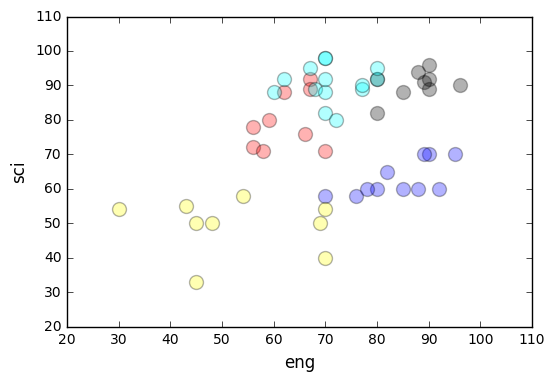

In [ ]:
# 그래프 그리기 (시각화)
ldata = academy_arr[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='red' ,alpha=0.3,s=100 ,marker="o")

ldata = academy_arr[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='blue' ,alpha=0.3,s=100 ,marker="o")

ldata = academy_arr[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='yellow' ,alpha=0.3,s=100 ,marker="o")

ldata = academy_arr[labels == 3]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='black' ,alpha=0.3,s=100 ,marker="o")

ldata = academy_arr[labels == 4]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='cyan' ,alpha=0.3,s=100 ,marker="o")

# 축 라벨의 설정
plt.xlabel(academy.columns[2],fontsize='large')
plt.ylabel(academy.columns[3],fontsize='large')

plt.show()

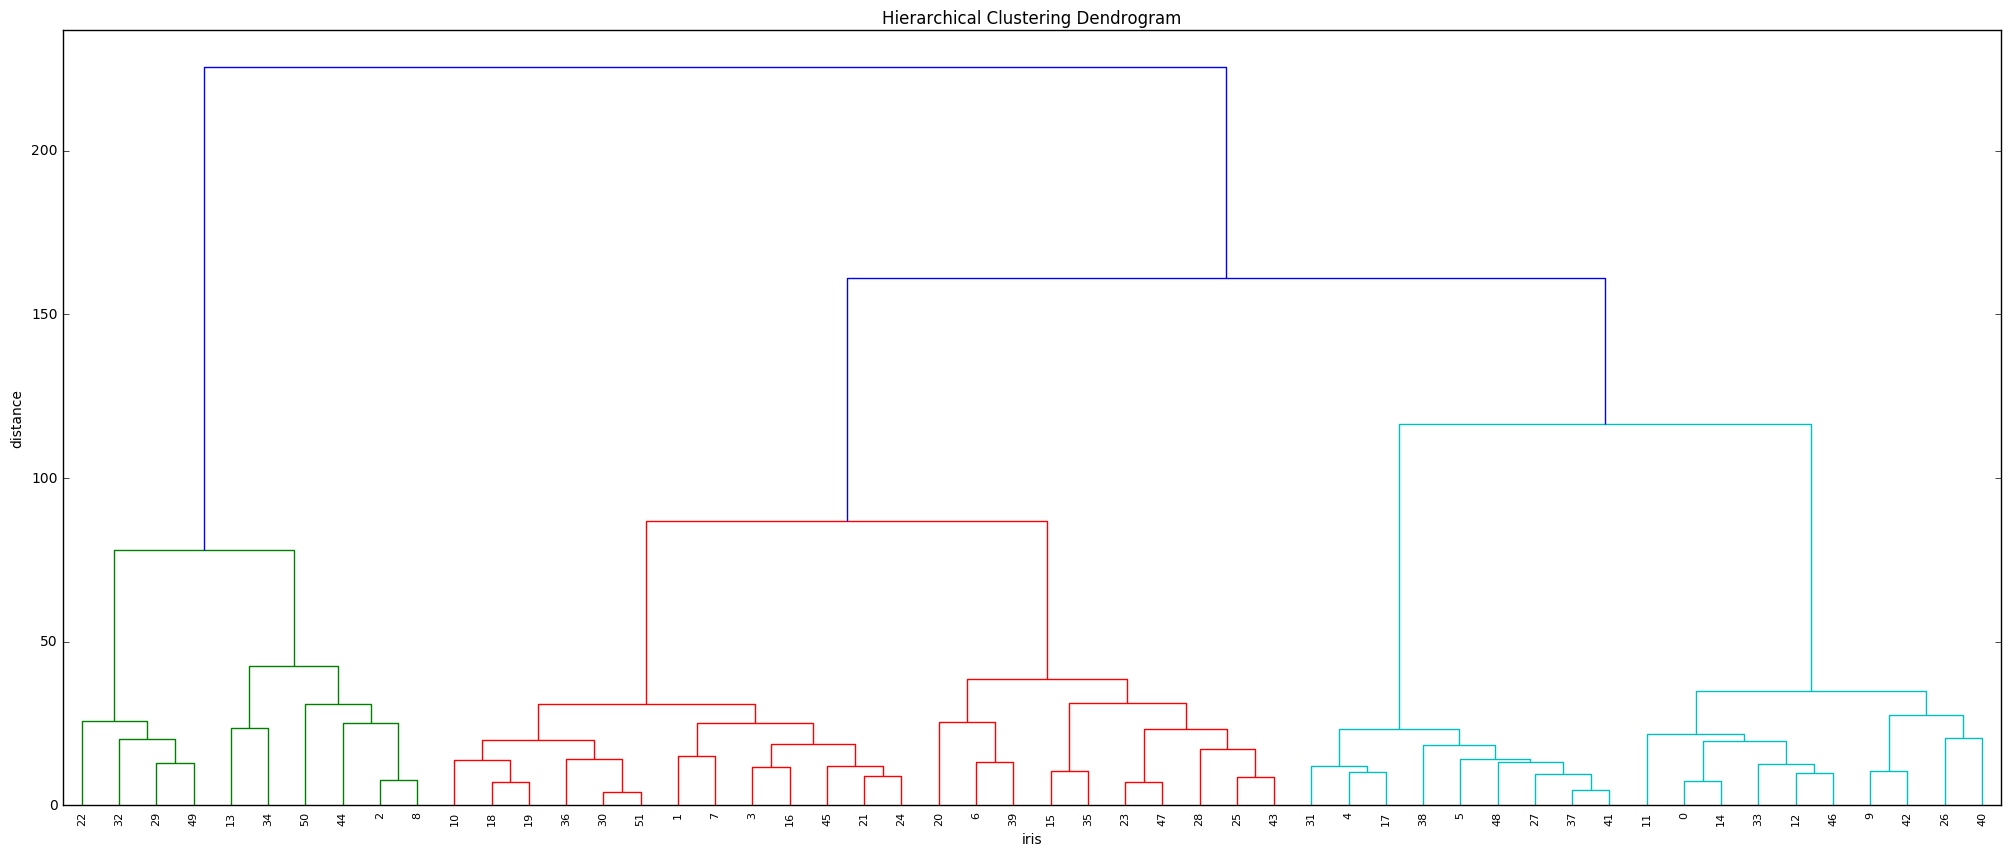

In [ ]:
# calculate full
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(academy_arr , 'ward') # 링크 정보 : 거리함수 ward 사용

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

k=3이 제일 적절하나, 이는 주관적인 기준